# Algoritmos genéticos: implementação manual
> Problema: Maximizar o lucro no transporte de produtos com um limite na quantidade de peso que é possível no transporte.

In [0]:
from random import random
import matplotlib.pyplot as plt

In [0]:
class Produto():
  def __init__(self, nome, espaco, valor):
    self.nome = nome
    self.espaco = espaco
    self.valor = valor

In [0]:
class Individuo():
  def __init__(self, espacos, valores, limite_espacos, geracao=0):
    self.espacos = espacos
    self.espaco_usado = 0
    self.valores = valores
    self.limite_espacos = limite_espacos

    self.geracao = geracao
    self.nota_avaliacao = 0
    self.cromossomo = []

    for i in range(len(espacos)):
      if(random() < 0.5):
        self.cromossomo.append(0)
      else:
        self.cromossomo.append(1)
  
  def avaliacao(self):
    nota = 0
    soma_espacos = 0
    for i in range(len(self.cromossomo)):
      if(self.cromossomo[i] == 1):
        nota += self.valores[i]
        soma_espacos += self.espacos[i]
      
      if(soma_espacos > self.limite_espacos):
        nota = 1
      self.nota_avaliacao = nota
      self.espaco_usado = soma_espacos
  
  def crossover(self, outro_individuo):
    corte = round(random() + len(self.cromossomo))
    
    filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
    filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]
    
    filhos = (Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1),
              Individuo(self.espacos, self.valores, self.limite_espacos, self.geracao + 1))

    filhos[0].cromossomo = filho1
    filhos[1].cromossomo = filho2
    return filhos
  
  def mutacao(self, taxa_mutacao):
    for i in range(len(self.cromossomo)):
      if(random() < taxa_mutacao):
        if(self.cromossomo[i] == 1):
          self.cromossomo[i] = 0
        else:
          self.cromossomo[i] = 1
    return self

In [0]:
class AlgoritmoGenetico():
  def __init__(self, tamanho_populacao):
    self.tamanho_populacao = tamanho_populacao
    self.populacao = []
    self.geracao = 0
    self.melhor_solucao = 0
    self.solucoes = []
  
  def inicializa_populacao(self, espacos, valores, limite_espacos):
    for i in range(self.tamanho_populacao):
      self.populacao.append(Individuo(espacos, valores, limite))
    self.melhor_solucao = self.populacao[0]

  def melhor_individuo(self, individuo):
    if(individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao):
      self.melhor_solucao = individuo

  def ordena_populacao(self):
    self.populacao = sorted(self.populacao, key= lambda populacao: populacao.nota_avaliacao, reverse= True)
  
  def avaliacao_populacao(self):
    for individuo in self.populacao:
      individuo.avaliacao()
  
  def soma_avaliacoes(self):
    soma = 0
    for individuo in self.populacao:
      soma += individuo.nota_avaliacao
    return soma
  
  # selRoulette
  def seleciona_pai(self, soma_avaliacao):
    pai = -1
    valor_sorteado = random() * soma_avaliacao
    soma = 0
    i = 0
    while(i < len(self.populacao) and soma < valor_sorteado):
      soma += self.populacao[i].nota_avaliacao
      pai += 1
      i += 1
    return pai
  
  def visualiza_geracao(self):
    melhor = self.populacao[0]
    print( f'## Geração: {melhor.geracao} ##\n - Valor: {melhor.nota_avaliacao}\n - Espaço: {melhor.espacos}\n - Cromossomo: {melhor.cromossomo}' )
  
  def resolver(self, taxa_mutacao, numero_geracoes, espacos, valores, limite_espacos):
    self.inicializa_populacao(espacos, valores, limite_espacos)
    self.avaliacao_populacao()
    self.ordena_populacao()
    self.melhor_individuo(self.populacao[0])  
    self.visualiza_geracao()
    self.solucoes.append(self.melhor_solucao.nota_avaliacao)

    for geracao in range(numero_geracoes):
      soma_avaliacao = self.soma_avaliacoes()
      nova_populacao = []
      for ind_ger in range(0, self.tamanho_populacao, 2):
        pai1 = self.seleciona_pai(soma_avaliacao)
        pai2 = self.seleciona_pai(soma_avaliacao)

        filhos = self.populacao[pai1].crossover(self.populacao[pai2])
        nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
        nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
      
      #self.geracao += 1
      self.populacao = list(nova_populacao)
      
      self.avaliacao_populacao()
      self.ordena_populacao()
      self.melhor_individuo(self.populacao[0])  
      self.visualiza_geracao()
      self.solucoes.append(self.melhor_solucao.nota_avaliacao)
    
    print('\n'*2 + f'Melhor solução\n - Geração: {self.melhor_solucao.geracao}\n - Espaço: {self.melhor_solucao.espacos}\n - Valor: {self.melhor_solucao.nota_avaliacao}\n - Cromossomo: {self.melhor_solucao.cromossomo}')
    return self.melhor_solucao

In [0]:
lista_produtos = []
lista_produtos.append(Produto("Geladeira Dako", 0.751, 999.90))
lista_produtos.append(Produto("Iphone 6", 0.0000899, 2911.12))
lista_produtos.append(Produto("TV 55' ", 0.400, 4346.99))
lista_produtos.append(Produto("TV 50' ", 0.290, 3999.90))
lista_produtos.append(Produto("TV 42' ", 0.200, 2999.00))
lista_produtos.append(Produto("Notebook Dell", 0.00350, 2499.90))
lista_produtos.append(Produto("Ventilador Panasonic", 0.496, 199.90))
lista_produtos.append(Produto("Microondas Electrolux", 0.0424, 308.66))
lista_produtos.append(Produto("Microondas LG", 0.0544, 429.90))
lista_produtos.append(Produto("Microondas Panasonic", 0.0319, 299.29))
lista_produtos.append(Produto("Geladeira Brastemp", 0.635, 849.00))
lista_produtos.append(Produto("Geladeira Consul", 0.870, 1199.89))
lista_produtos.append(Produto("Notebook Asus", 0.527, 3999.00))
lista_produtos.append(Produto("Notebook Lenovo", 0.498, 1999.90))

espacos = [p.espaco for p in lista_produtos]
valores = [p.valor for p in lista_produtos]
nomes = [p.nome for p in lista_produtos]

tamanho_populacao = 20
limite = 3
taxa_mutacao = 0.01
geracoes = 100

ag = AlgoritmoGenetico(tamanho_populacao)
resultado = ag.resolver(taxa_mutacao, geracoes, espacos, valores, limite)

print('Produtos:')
for i in range(len(resultado.cromossomo)):
  if(resultado.cromossomo[i]  == 1):
    print(f' - {nomes[i]} - Valor: {valores[i]}')

## Geração: 0 ##
 - Valor: 18335.100000000002
 - Espaço: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.527, 0.498]
 - Cromossomo: [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]
## Geração: 1 ##
 - Valor: 18265.370000000003
 - Espaço: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.527, 0.498]
 - Cromossomo: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
## Geração: 2 ##
 - Valor: 18265.370000000003
 - Espaço: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.527, 0.498]
 - Cromossomo: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
## Geração: 3 ##
 - Valor: 18564.660000000003
 - Espaço: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.527, 0.498]
 - Cromossomo: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
## Geração: 4 ##
 - Valor: 18564.660000000003
 - Espaço: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.8

Text(0.5, 1.0, 'Acompanhamento dos valores')

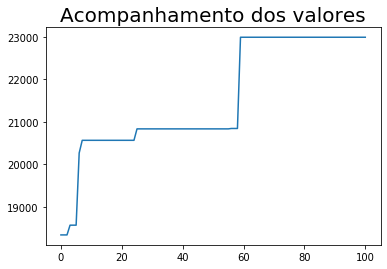

In [0]:
plt.plot(ag.solucoes)
plt.title('Acompanhamento dos valores', fontdict={'fontsize':20})

# Algoritmos genéticos: Biblioteca DEAP
> Exemplo: Maximizar o lucro no transporte de produtos com um limite na quantidade de peso que é possível no transporte.

In [0]:
%pip install deap

     |████████████████████████████████| 163kB 4.9MB/s 


In [0]:
import random, numpy
from deap import base, creator, algorithms, tools

In [0]:
class Produto():
  def __init__(self, nome, espaco, valor):
    self.nome = nome
    self.espaco = espaco
    self.valor = valor

lista_produtos = []
lista_produtos.append(Produto("Geladeira Dako", 0.751, 999.90))
lista_produtos.append(Produto("Iphone 6", 0.0000899, 2911.12))
lista_produtos.append(Produto("TV 55' ", 0.400, 4346.99))
lista_produtos.append(Produto("TV 50' ", 0.290, 3999.90))
lista_produtos.append(Produto("TV 42' ", 0.200, 2999.00))
lista_produtos.append(Produto("Notebook Dell", 0.00350, 2499.90))
lista_produtos.append(Produto("Ventilador Panasonic", 0.496, 199.90))
lista_produtos.append(Produto("Microondas Electrolux", 0.0424, 308.66))
lista_produtos.append(Produto("Microondas LG", 0.0544, 429.90))
lista_produtos.append(Produto("Microondas Panasonic", 0.0319, 299.29))
lista_produtos.append(Produto("Geladeira Brastemp", 0.635, 849.00))
lista_produtos.append(Produto("Geladeira Consul", 0.870, 1199.89))
lista_produtos.append(Produto("Notebook Asus", 0.527, 3999.00))
lista_produtos.append(Produto("Notebook Lenovo", 0.498, 1999.90))

espacos = [p.espaco for p in lista_produtos]
valores = [p.valor for p in lista_produtos]
nomes = [p.nome for p in lista_produtos]

limite = 3

In [0]:
toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights=(1.0, ))
creator.create('Individual', list, fitness= creator.FitnessMax)
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register('individulal', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(espacos))
toolbox.register('population', tools.initRepeat, list, toolbox.individulal)

def avaliacao(individual):
  nota = 0
  soma_espacos = 0
  for i in range(len(individual)):
    if(individual[i] == 1):
      nota += valores[i]
      soma_espacos += espacos[i]
  if(soma_espacos > limite):
    nota = 1
  return nota / 10000,

toolbox.register('evaluate', avaliacao)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb= 0.01)
toolbox.register('select', tools.selRoulette)

populacao = toolbox.population(20)
prob_crossover = 1.0
prob_mutacao = 0.01
num_geracoes = 100

estatisticas = tools.Statistics(key= lambda individuo: individuo.fitness.values)
estatisticas.register('max', numpy.max)
estatisticas.register('min', numpy.min)
estatisticas.register('med', numpy.mean)
estatisticas.register('std', numpy.std)

populacao, info = algorithms.eaSimple(populacao, toolbox, prob_crossover, prob_mutacao, num_geracoes, estatisticas)

gen	nevals	max    	min   	med     	std     
0  	20    	1.78534	0.0001	0.840772	0.618789
1  	20    	2.12938	0.0001	0.998671	0.672488
2  	20    	2.12938	0.639588	1.62247 	0.430997
3  	20    	2.12938	0.94287 	1.77729 	0.334176
4  	20    	2.35637	1.44756 	1.89726 	0.252662
5  	20    	2.36849	1.20844 	1.8086  	0.313557
6  	20    	2.36849	1.20844 	1.77575 	0.351044
7  	20    	2.36849	1.20844 	1.82356 	0.326046
8  	20    	2.36849	0.0001  	1.66532 	0.498805
9  	20    	2.36849	1.44756 	1.8442  	0.301824
10 	20    	2.36849	1.44756 	1.88953 	0.279943
11 	20    	2.36849	0.0001  	1.85847 	0.490586
12 	20    	2.36849	1.67748 	2.02611 	0.169007
13 	20    	2.36849	1.47749 	2.05525 	0.247216
14 	20    	2.36849	0.0001  	1.97938 	0.507868
15 	20    	2.36849	1.7686  	2.15795 	0.16981 
16 	20    	2.36849	1.7686  	2.18855 	0.179199
17 	20    	2.36849	1.73245 	2.26081 	0.166557
18 	20    	2.36849	2.02356 	2.30417 	0.108147
19 	20    	2.36849	0.0001  	2.16426 	0.513639
20 	20    	2.36849	1.93866 	2.21908 	0.1

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
(2.3385610000000003,)
Nome: Iphone 6 - Valor: 2911.12
Nome: TV 55'  - Valor: 4346.99
Nome: TV 50'  - Valor: 3999.9
Nome: TV 42'  - Valor: 2999.0
Nome: Notebook Dell - Valor: 2499.9
Nome: Ventilador Panasonic - Valor: 199.9
Nome: Microondas LG - Valor: 429.9
Nome: Notebook Asus - Valor: 3999.0
Nome: Notebook Lenovo - Valor: 1999.9
Melhor solução: 23385.610000000004


Text(0.5, 1.0, 'Acompanhamento dos valores')

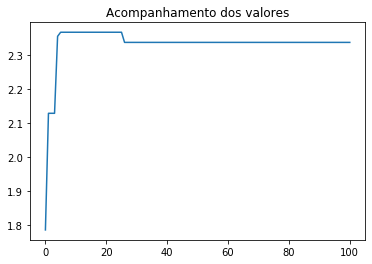

In [0]:
melhores = tools.selBest(populacao, 1)

for i in melhores:
  print(i)
  print(i.fitness)
  soma = 0
  for s in range(len(lista_produtos)):
    if(i[s] == 1):
      soma += valores[s]
      print(f'Nome: {nomes[s]} - Valor: {valores[s]}')
  print(f'Melhor solução: {soma}')

valores_grafico = info.select('max')
plt.plot(valores_grafico)
plt.title('Acompanhamento dos valores')